## Model Results Comparison

### 1. Imports

In [10]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Print results

Random Forest scores:
  ROC-AUC   : 0.9571
  PR-AUC    : 0.8706
Combined Score : 0.9138
MLP scores:
  ROC-AUC   : 0.9494
  PR-AUC    : 0.8562
Combined Score : 0.9028
XGBoost scores:
  ROC-AUC   : 0.9591
  PR-AUC    : 0.8821
Combined Score : 0.9206
Logistic Regression scores:
  ROC-AUC   : 0.9414
  PR-AUC    : 0.8135
Combined Score : 0.8774

Model Comparison Table:


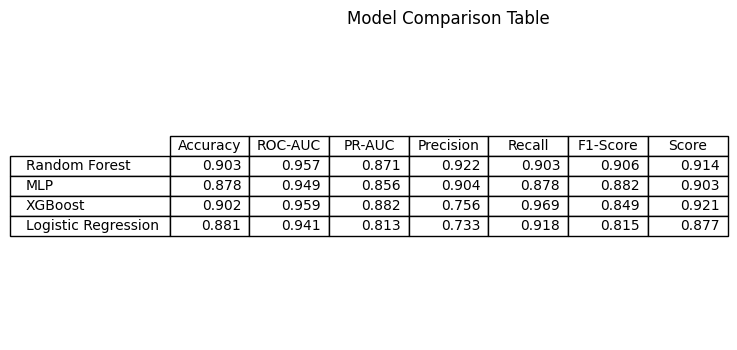

In [4]:
# Load JSON file
with open("final_scores.json", "r") as f:
    scores = json.load(f)

# Accessing metrics
rf_scores = scores["RandomForest"]
rf_acc      = rf_scores["accuracy"]
rf_roc_auc   = rf_scores["roc_auc"]
rf_pr_auc    = rf_scores["pr_auc"]
rf_precision = rf_scores["precision"]
rf_recall    = rf_scores["recall"]
rf_f1        = rf_scores["f1"]
mlp_scores = scores["DeepNeuralNetwork"]
mlp_acc  = mlp_scores["accuracy"]
mlp_roc_auc   = mlp_scores["roc_auc"]
mlp_pr_auc    = mlp_scores["pr_auc"]
mlp_precision = mlp_scores["precision"]
mlp_recall    = mlp_scores["recall"]
mlp_f1        = mlp_scores["f1"]
xgb_scores = scores["XGBoost"]
xgb_acc  = xgb_scores["accuracy"]
xgb_roc_auc   = xgb_scores["roc_auc"]
xgb_pr_auc    = xgb_scores["pr_auc"]
xgb_precision = xgb_scores["precision"]
xgb_recall    = xgb_scores["recall"]
xgb_f1        = xgb_scores["f1"]
logreg_scores = scores["LogisticRegression"]
logreg_acc  = logreg_scores["accuracy"]
logreg_roc_auc   = logreg_scores["roc_auc"]
logreg_pr_auc    = logreg_scores["pr_auc"]
logreg_precision = logreg_scores["precision"]
logreg_recall    = logreg_scores["recall"]
logreg_f1        = logreg_scores["f1"]


# Print
print("Random Forest scores:")
print(f"  ROC-AUC   : {rf_roc_auc:.4f}")
print(f"  PR-AUC    : {rf_pr_auc:.4f}")
print(f"Combined Score : {(rf_roc_auc + rf_pr_auc) / 2:.4f}")
print("MLP scores:")
print(f"  ROC-AUC   : {mlp_roc_auc:.4f}")
print(f"  PR-AUC    : {mlp_pr_auc:.4f}")
print(f"Combined Score : {(mlp_roc_auc + mlp_pr_auc) / 2:.4f}")
print("XGBoost scores:")
print(f"  ROC-AUC   : {xgb_roc_auc:.4f}")
print(f"  PR-AUC    : {xgb_pr_auc:.4f}")
print(f"Combined Score : {(xgb_roc_auc + xgb_pr_auc) / 2:.4f}")
print("Logistic Regression scores:")
print(f"  ROC-AUC   : {logreg_roc_auc:.4f}")
print(f"  PR-AUC    : {logreg_pr_auc:.4f}")
print(f"Combined Score : {(logreg_roc_auc + logreg_pr_auc) / 2:.4f}")   

# Table over all metrics
metrics = ["Accuracy", "ROC-AUC", "PR-AUC", "Precision", "Recall", "F1-Score", "Score"]
rf_values = [rf_acc, rf_roc_auc, rf_pr_auc, rf_precision, rf_recall, rf_f1, (rf_roc_auc + rf_pr_auc) / 2]
mlp_values = [mlp_acc, mlp_roc_auc, mlp_pr_auc, mlp_precision, mlp_recall, mlp_f1, (mlp_roc_auc + mlp_pr_auc) / 2]
xgb_values = [xgb_acc, xgb_roc_auc, xgb_pr_auc, xgb_precision, xgb_recall, xgb_f1, (xgb_roc_auc + xgb_pr_auc) / 2]
logreg_values = [logreg_acc, logreg_roc_auc, logreg_pr_auc, logreg_precision, logreg_recall, logreg_f1, (logreg_roc_auc + logreg_pr_auc) / 2] 
df = pd.DataFrame({
    "Metric": metrics,
    "Random Forest": rf_values,
    "MLP": mlp_values,
    "XGBoost": xgb_values,
    "Logistic Regression": logreg_values
})
print("\nModel Comparison Table:")
# Plot a table with 3 decimals with models as rows and metrics as columns as a graph
fig, ax = plt.subplots(figsize=(6, 4))
table_data = np.round(df.set_index("Metric").T.values, 3)
row_labels = df.columns[1:]
col_labels = df["Metric"].values
table = ax.table(cellText=table_data, rowLabels=row_labels, colLabels=col_labels, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
ax.axis('off')
ax.set_title("Model Comparison Table")
plt.show()




### 3. Visualizations

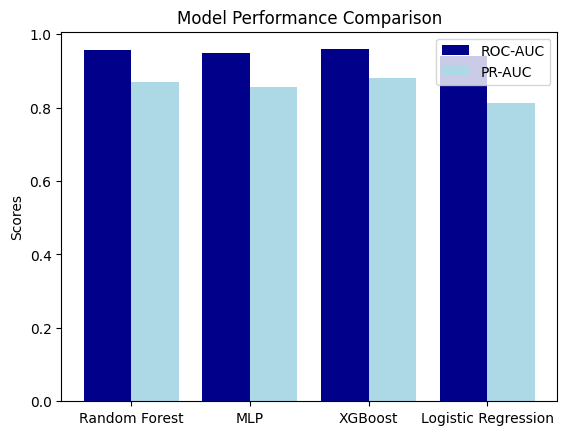

In [5]:
#Plot results
models = ['Random Forest', 'MLP', 'XGBoost', 'Logistic Regression']
roc_auc_scores = [rf_roc_auc, mlp_roc_auc, xgb_roc_auc, logreg_roc_auc]
pr_auc_scores = [rf_pr_auc, mlp_pr_auc, xgb_pr_auc, logreg_pr_auc]
x = range(len(models))
plt.bar(x, roc_auc_scores, width=0.4, label='ROC-AUC', color='darkblue', align='center')
plt.bar([p + 0.4 for p in x], pr_auc_scores, width=0.4, label='PR-AUC', color='lightblue', align='center')
plt.xticks([p + 0.2 for p in x], models)
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.legend()
plt.show()


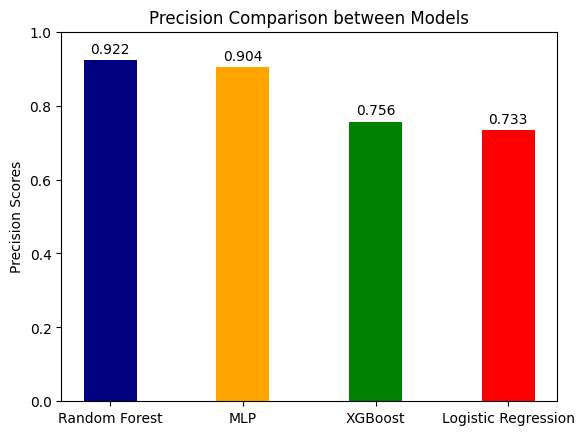

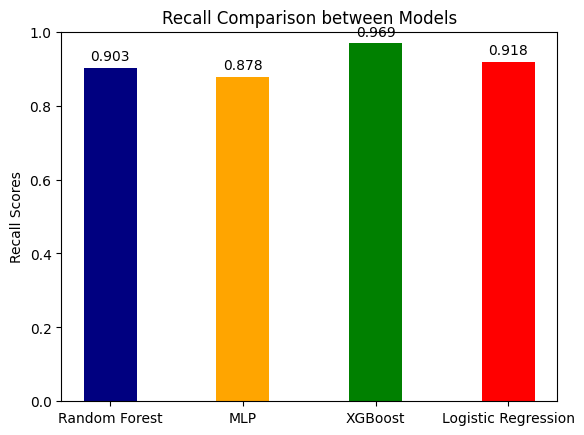

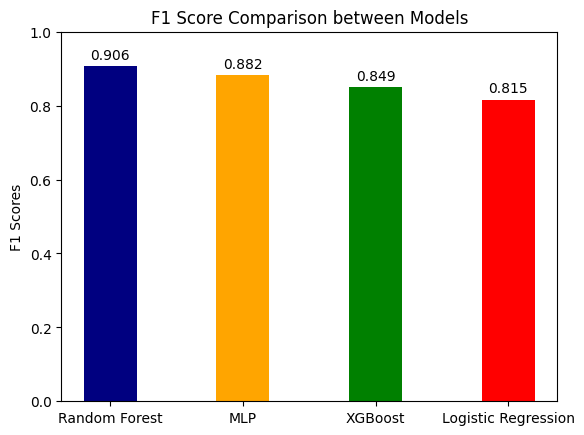

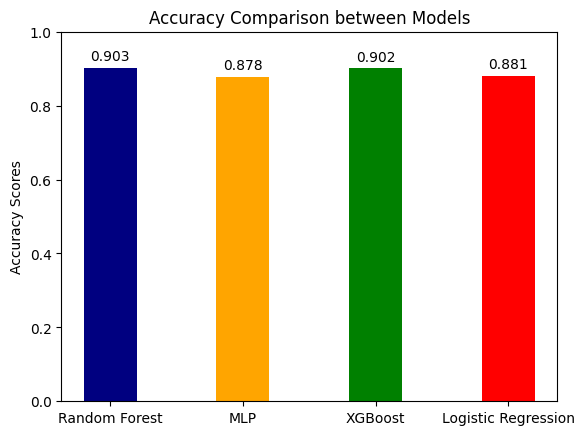

In [6]:
# Comparing precision
labels = ['Random Forest', 'MLP', 'XGBoost', 'Logistic Regression']
precision_scores = [rf_precision, mlp_precision, xgb_precision, logreg_precision]
x = np.arange(len(labels))
width = 0.4
fig, ax = plt.subplots()
bars = ax.bar(x, precision_scores, width, color=['navy', 'orange', 'green', 'red'])
ax.set_ylabel('Precision Scores')
ax.set_title('Precision Comparison between Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')
plt.ylim(0, 1)
plt.show()
# Comparing recall
recall_scores = [rf_recall, mlp_recall, xgb_recall, logreg_recall]
fig, ax = plt.subplots()
bars = ax.bar(x, recall_scores, width, color=['navy', 'orange', 'green', 'red'])
ax.set_ylabel('Recall Scores')
ax.set_title('Recall Comparison between Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
for bar in bars:    
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')
plt.ylim(0, 1)
plt.show()
# Comparing F1 Score
f1_scores = [rf_f1, mlp_f1, xgb_f1, logreg_f1]
fig, ax = plt.subplots()
bars = ax.bar(x, f1_scores, width, color=['navy', 'orange', 'green', 'red'])
ax.set_ylabel('F1 Scores')
ax.set_title('F1 Score Comparison between Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
for bar in bars:    
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')
plt.ylim(0, 1)
plt.show()
#Comparing Accuracy
accuracy_scores = [rf_acc, mlp_acc, xgb_acc, logreg_acc]
fig, ax = plt.subplots()
bars = ax.bar(x, accuracy_scores, width, color=['navy', 'orange', 'green', 'red'])
ax.set_ylabel('Accuracy Scores')
ax.set_title('Accuracy Comparison between Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
for bar in bars:    
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')
plt.ylim(0, 1)
plt.show()  


In [ ]:
# Wins per metric
metric_winner_values = df.set_index("Metric").max(axis=1)
print(pd.concat([metric_winners, metric_winner_values], axis=1)
        .rename(columns={0: "BestModel", 1: "BestValue"}))


               BestModel  BestValue
Metric                             
Accuracy   Random Forest   0.903073
ROC-AUC          XGBoost   0.959092
PR-AUC           XGBoost   0.882082
Precision  Random Forest   0.922178
Recall           XGBoost   0.968586
F1-Score   Random Forest   0.906202
Score            XGBoost   0.920587


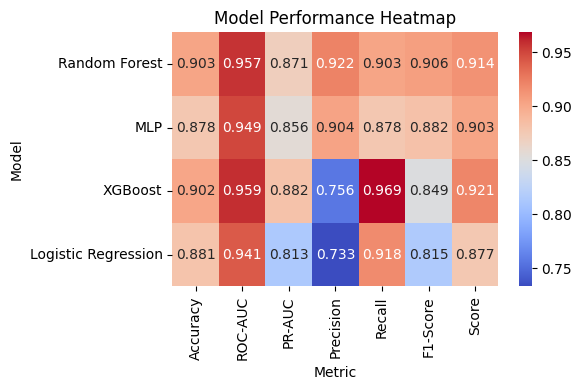

In [14]:
perf_matrix = df.set_index("Metric").T  # models x metrics
plt.figure(figsize=(6, 4))
sns.heatmap(perf_matrix, annot=True, fmt=".3f", cmap="coolwarm")
plt.title("Model Performance Heatmap")
plt.xlabel("Metric")
plt.ylabel("Model")
plt.tight_layout()
plt.show()


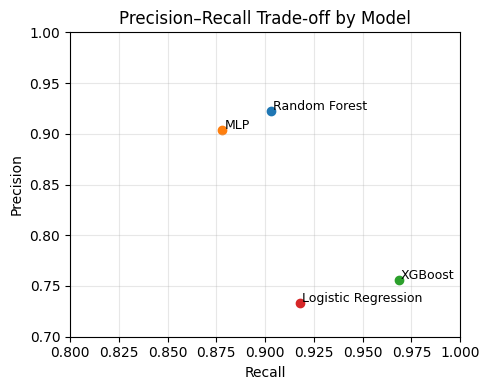

In [15]:
precisions = {
    "Random Forest": rf_precision,
    "MLP": mlp_precision,
    "XGBoost": xgb_precision,
    "Logistic Regression": logreg_precision,
}
recalls = {
    "Random Forest": rf_recall,
    "MLP": mlp_recall,
    "XGBoost": xgb_recall,
    "Logistic Regression": logreg_recall,
}

plt.figure(figsize=(5, 4))
for model in precisions.keys():
    plt.scatter(recalls[model], precisions[model])
    plt.text(recalls[model] + 0.001, precisions[model] + 0.001, model,
             fontsize=9)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim(0.8, 1.0)   # adjust depending on your actual values
plt.ylim(0.7, 1.0)
plt.title("Precision–Recall Trade-off by Model")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


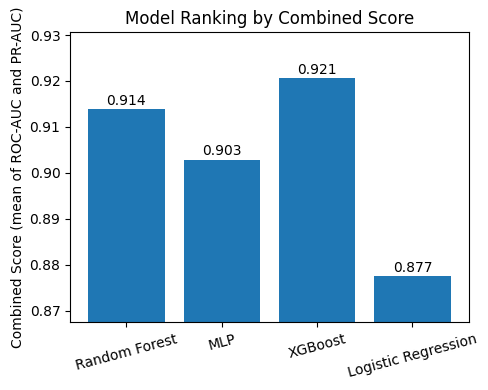

In [16]:
scores_dict = {
    "Random Forest": (rf_roc_auc + rf_pr_auc) / 2,
    "MLP": (mlp_roc_auc + mlp_pr_auc) / 2,
    "XGBoost": (xgb_roc_auc + xgb_pr_auc) / 2,
    "Logistic Regression": (logreg_roc_auc + logreg_pr_auc) / 2,
}

models = list(scores_dict.keys())
scores_values = list(scores_dict.values())

plt.figure(figsize=(5, 4))
plt.bar(models, scores_values)
plt.ylabel("Combined Score (mean of ROC-AUC and PR-AUC)")
plt.ylim(min(scores_values) - 0.01, max(scores_values) + 0.01)
for i, v in enumerate(scores_values):
    plt.text(i, v + 0.001, f"{v:.3f}", ha="center")
plt.title("Model Ranking by Combined Score")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


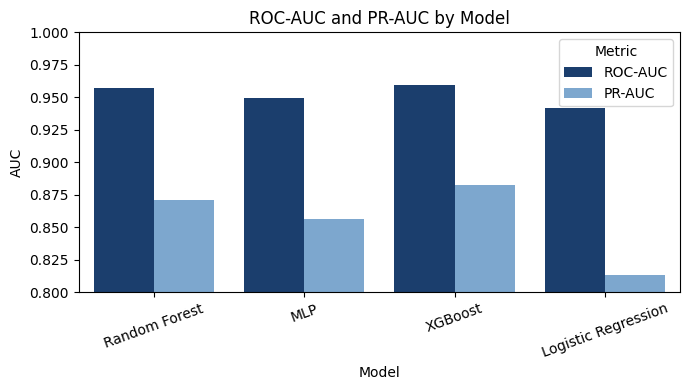

In [23]:
plt.figure(figsize=(7, 4))
sns.barplot(
    data=df_auc_long,
    x="Model",
    y="Value",
    hue="Metric",
    palette=["#0d3c7b", "#6fa8dc"]  # dark blue, light blue
)
plt.ylim(0.8, 1.0)
plt.xticks(rotation=20)
plt.ylabel("AUC")
plt.title("ROC-AUC and PR-AUC by Model")
plt.tight_layout()
plt.show()


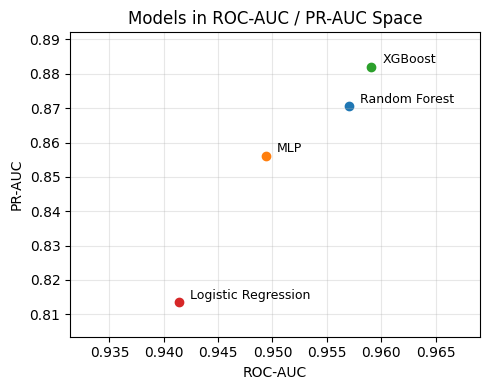

In [ ]:
models = ["Random Forest", "MLP", "XGBoost", "Logistic Regression"]
roc_values = [rf_roc_auc, mlp_roc_auc, xgb_roc_auc, logreg_roc_auc]
pr_values  = [rf_pr_auc,  mlp_pr_auc,  xgb_pr_auc,  logreg_pr_auc]

plt.figure(figsize=(5, 4))
for m, roc, pr in zip(models, roc_values, pr_values):
    plt.scatter(roc, pr)
    plt.text(roc + 0.001, pr + 0.001, m, fontsize=9)

plt.xlabel("ROC-AUC")
plt.ylabel("PR-AUC")
plt.xlim(min(roc_values) - 0.01, max(roc_values) + 0.01)
plt.ylim(min(pr_values)  - 0.01, max(pr_values)  + 0.01)
plt.title("Models in ROC-AUC / PR-AUC Space")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
